TODO:
* Concept of baseband and carrier 
* Noise
* Filtering

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def constellation_plot(ax, freq, t, signal, samples_per_symbol, title='Constellation Diagram', **kargs):
    signal = signal * np.exp(-1j*2*np.pi*t*freq)
    signal /= np.max(np.abs(signal))
    signal *= np.exp(-1j*np.angle(signal[0]))
    x = np.real(signal)
    y = np.imag(signal)
    
    # Scatter plot with centred axes
    ax.scatter(x, y, *kargs)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_xlabel("Re", loc="right")
    ax.set_ylabel("Im", loc="top", rotation=0)
    ax.set_aspect(1)
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_title(title, y=1.05)

In [141]:
def time_plot(ax, t, signal, xlabel="t", ylabel="f(t)", title="Signal", **kargs):
    ax.plot(t, np.real(signal), **kargs)
    if not np.allclose(np.imag(signal), 0):
        ax.plot(t, np.imag(signal))
    ax.set_ylabel(ylabel)
    ax.set_xlabel(xlabel)
    ax.set_title(title)

In [36]:
def spectrum_plot(ax, signal, samples_per_second):
    ps = np.abs(np.fft.fft(signal))**2
    freqs = np.fft.fftfreq(signal.size, 1/samples_per_second)
    idx = np.argsort(freqs)
    ax.plot(freqs[idx], ps[idx])
    ax.set_title("Spectrum")
    ax.set_xlabel("f")

In [311]:
seconds_per_symbol = 0.17
samples_per_second = 1e5
samples_per_symbol = int(samples_per_second * seconds_per_symbol)
freq = 10 # Hz

data = np.array([0, 0, 1, 1, 1, 0, 1, 1] * 10)
nrz = 2 * data - 1

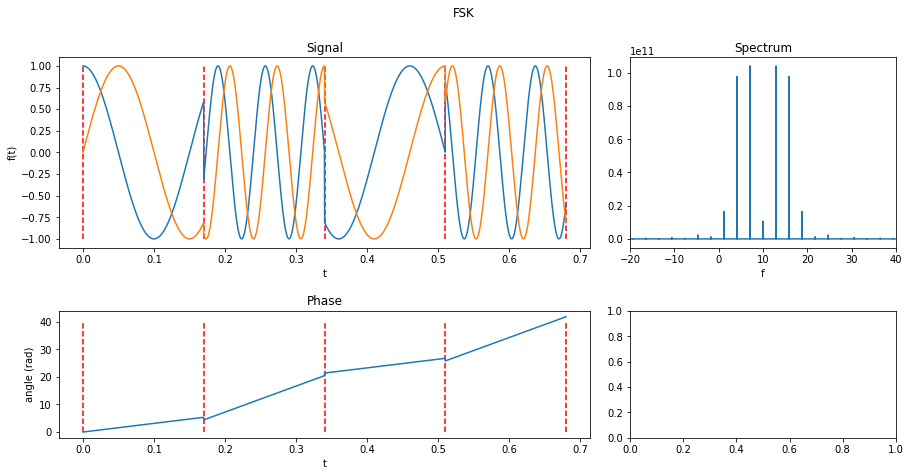

In [159]:
# Example 1: Frequency Shift Keying (FSK)
freq_dev = 5 # Hz

_nrz = np.repeat(nrz, samples_per_symbol)

t = np.linspace(0, _nrz.size / samples_per_second, _nrz.size)

# Frequency modulation
signal = np.exp(2*np.pi*1j*t*freq + 2*np.pi*1j*_nrz*freq_dev*(t-n*seconds_per_symbol))

fig, axs = plt.subplots(2, 2, figsize=(15,7), gridspec_kw={"width_ratios":[2,1],"height_ratios":[3,2],"wspace":0.1,"hspace":0.4})
axs[0][0].vlines(np.arange(5)*seconds_per_symbol, -1, 1, 'r', linestyle='--')
time_plot(axs[0][0], t[:4*samples_per_symbol], signal[:4*samples_per_symbol])
spectrum_plot(axs[0][1], signal, samples_per_second)
axs[0][1].set_xlim(-20, 40)
time_plot(axs[1][0], t[:4*samples_per_symbol], np.unwrap(np.angle(signal[:4*samples_per_symbol])), title="Phase", ylabel="angle (rad)")
axs[1][0].vlines(np.arange(5)*seconds_per_symbol, 0, 40, 'r', linestyle='--')
plt.suptitle("FSK")
plt.show()

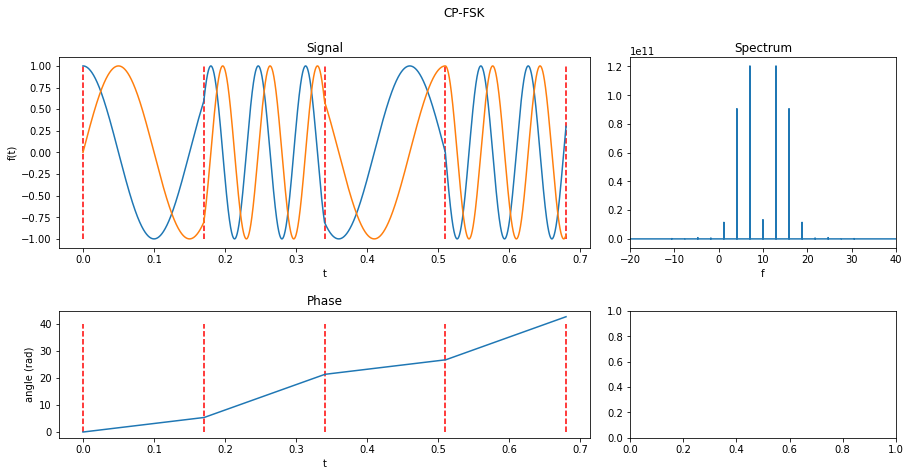

In [155]:
# Example 2: Continuous Phase FSK (CP-FSK)
# https://www.dsprelated.com/showarticle/1016.php
freq_dev = 5 # Hz

_nrz = np.repeat(nrz, samples_per_symbol)

t = np.linspace(0, _nrz.size / samples_per_second, _nrz.size)

# Frequency modulation
theta = np.roll(np.cumsum(nrz), 1)
theta[0] = 0
theta = theta.repeat(samples_per_symbol) * (np.pi / 2) * (4 * freq_dev * seconds_per_symbol)
n = np.arange(nrz.shape[0]).repeat(samples_per_symbol)
signal = np.exp(2*np.pi*1j*t*freq + 2*np.pi*1j*_nrz*freq_dev*(t-n*seconds_per_symbol) + 1j*theta)

fig, axs = plt.subplots(2, 2, figsize=(15,7), gridspec_kw={"width_ratios":[2,1],"height_ratios":[3,2],"wspace":0.1,"hspace":0.4})
axs[0][0].vlines(np.arange(5)*seconds_per_symbol, -1, 1, 'r', linestyle='--')
time_plot(axs[0][0], t[:4*samples_per_symbol], signal[:4*samples_per_symbol])
spectrum_plot(axs[0][1], signal, samples_per_second)
axs[0][1].set_xlim(-20, 40)
time_plot(axs[1][0], t[:4*samples_per_symbol], np.unwrap(np.angle(signal[:4*samples_per_symbol])), title="Phase", ylabel="angle (rad)")
axs[1][0].vlines(np.arange(5)*seconds_per_symbol, 0, 40, 'r', linestyle='--')
plt.suptitle("CP-FSK")
plt.show()

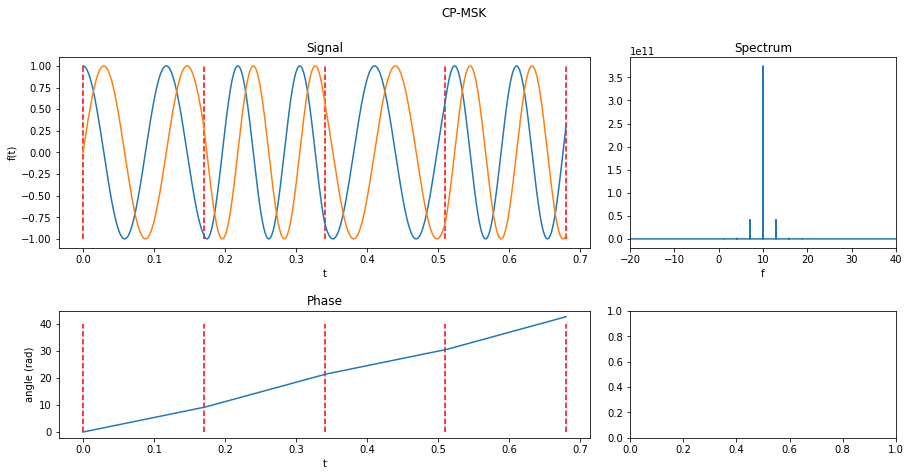

In [158]:
# Example 3: CP Minimum Shift Keying (CP-MSK)
# https://www.dsprelated.com/showarticle/1016.php

modulation_index = 0.5 # sometimes called 'h'
freq_dev = modulation_index / (2 * seconds_per_symbol) # freq_dev here is half deviation, ie 15+/-5 Hz --> freq_dev = 5 Hz (not 10 Hz))
_nrz = np.repeat(nrz, samples_per_symbol)

t = np.linspace(0, _nrz.size / samples_per_second, _nrz.size)

# Frequency modulation
theta = np.roll(np.cumsum(nrz), 1)
theta[0] = 0
                                                     # For the special case of CPMSK (h=0.5),
                                                     # this term is equal to 1 (you can check!)
theta = theta.repeat(samples_per_symbol) * np.pi / 2 # * (4 * freq_dev * seconds_per_symbol) 
n = np.arange(nrz.shape[0]).repeat(samples_per_symbol)
signal = np.exp(2*np.pi*1j*t*freq+2*np.pi*1j*_nrz*freq_dev*(t-n*seconds_per_symbol) + 1j*theta)

fig, axs = plt.subplots(2, 2, figsize=(15,7), gridspec_kw={"width_ratios":[2,1],"height_ratios":[3,2],"wspace":0.1,"hspace":0.4})
axs[0][0].vlines(np.arange(5)*seconds_per_symbol, -1, 1, 'r', linestyle='--')
time_plot(axs[0][0], t[:4*samples_per_symbol], signal[:4*samples_per_symbol])
spectrum_plot(axs[0][1], signal, samples_per_second)
axs[0][1].set_xlim(-20, 40)
time_plot(axs[1][0], t[:4*samples_per_symbol], np.unwrap(np.angle(signal[:4*samples_per_symbol])), title="Phase", ylabel="angle (rad)")
axs[1][0].vlines(np.arange(5)*seconds_per_symbol, 0, 40, 'r', linestyle='--')
plt.suptitle("CP-MSK")
plt.show()

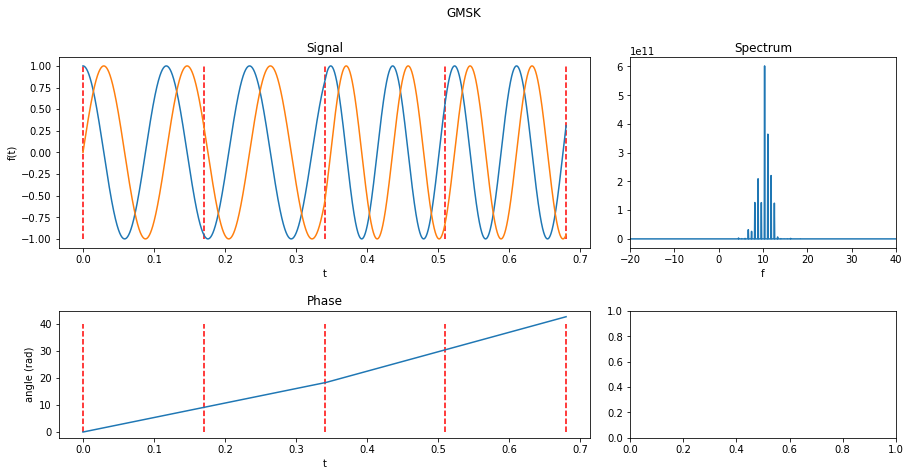

In [376]:
# Gaussian MSK (GMSK)

from scipy.signal import convolve

modulation_index = 0.5

# Gaussian filter parameters
BT = 0.05
M = 2 # size of Gaussian window in symbol periods (T)

freq_dev = modulation_index / (2 * seconds_per_symbol)
_nrz = np.repeat(nrz, samples_per_symbol)
t = np.linspace(0, _nrz.size / samples_per_second, _nrz.size)

# Frequency modulation
theta = np.roll(np.cumsum(nrz), 1)
theta[0] = 0
                                                     # For the special case of CPMSK (h=0.5),
                                                     # this term is equal to 1 (you can check!)
theta = theta.repeat(samples_per_symbol) * np.pi / 2 # * (4 * freq_dev * seconds_per_symbol) 
n = np.arange(nrz.shape[0]).repeat(samples_per_symbol)

# This might not be right!
# Filter the phase modulation with a Gaussian
B = BT * samples_per_symbol
gaussian = np.sqrt(2*np.pi/np.log(2)) * B * np.exp(-2*np.pi**2*B**2*(t[:M*samples_per_symbol] - t[M*samples_per_symbol]/2)**2/np.log(2))
phi = 2*np.pi*_nrz*freq_dev*(t-n*seconds_per_symbol)+theta
phi = convolve(phi, gaussian, mode="same") * (t[1] - t[0]) # must remember to multiply by dt !!

signal = np.exp(2*np.pi*1j*t*freq+ 1j*phi)

fig, axs = plt.subplots(2, 2, figsize=(15,7), gridspec_kw={"width_ratios":[2,1],"height_ratios":[3,2],"wspace":0.1,"hspace":0.4})
axs[0][0].vlines(np.arange(5)*seconds_per_symbol, -1, 1, 'r', linestyle='--')
time_plot(axs[0][0], t[:4*samples_per_symbol], signal[:4*samples_per_symbol])
spectrum_plot(axs[0][1], signal, samples_per_second)
axs[0][1].set_xlim(-20, 40)
time_plot(axs[1][0], t[:4*samples_per_symbol], np.unwrap(np.angle(signal[:4*samples_per_symbol])), title="Phase", ylabel="angle (rad)")
axs[1][0].vlines(np.arange(5)*seconds_per_symbol, 0, 40, 'r', linestyle='--')
plt.suptitle("GMSK")
plt.show()

Transmitted:  [0 0 1 1 1 0 1 1 0 0]
Received:     [0 0 1 1 1 0 1 1 0 0]


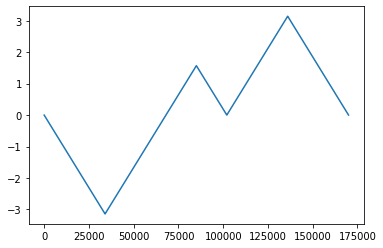

In [377]:
plt.plot(np.unwrap(np.angle(signal*np.exp(-2*np.pi*freq*t*1j))[:10*samples_per_symbol]))

decoded = np.unwrap(np.angle(signal*np.exp(-2*np.pi*freq*t*1j))[:10*samples_per_symbol])
decoded = decoded[samples_per_symbol//2+1::samples_per_symbol] - decoded[samples_per_symbol//2::samples_per_symbol]
decoded = 1 * (decoded > 0)
print("Transmitted: ", data[:10])
print("Received:    ", decoded)

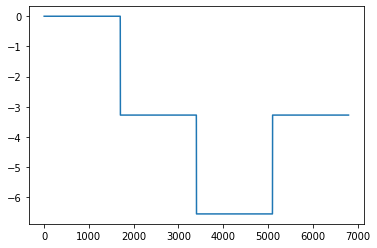

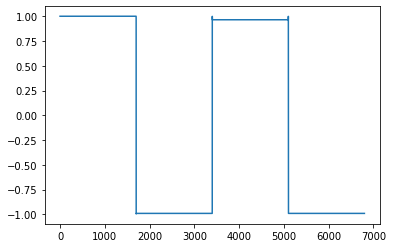

In [286]:
Phi = 2*np.pi*modulation_index*np.roll(np.cumsum(nrz), 1)
Phi[0] = 0
Phi = Phi.repeat(samples_per_symbol)
Phi = convolve(Phi, gaussian, mode="same") * (t[1] - t[0])

Phi = Phi[:4*samples_per_symbol]
plt.figure()
plt.plot(Phi)
plt.figure()
plt.plot(np.cos(Phi))

In [240]:
samples_per_symbol

1700

In [239]:
B

3000.0

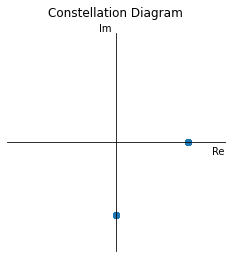

In [116]:
fig, ax = plt.subplots(1, 1)
constellation_plot(ax, freq, t[::samples_per_symbol], signal[::samples_per_symbol], samples_per_symbol)

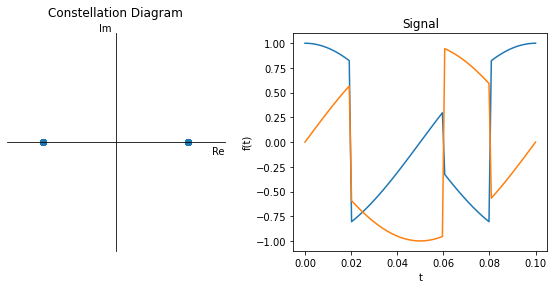

In [84]:
# Example 1: 2-PSK (2 mode phase shift key)
samples_per_symbol = 20
samples_per_second = 1000

freq = 5 # Hz

data = np.array([0, 1, 1, 0, 1])
_data = np.repeat(data, samples_per_symbol)

total_seconds = len(data) * samples_per_symbol / samples_per_second
t = np.linspace(0, total_seconds, len(data) * samples_per_symbol)

# Phase modulation
signal = np.exp(np.pi*1j*_data)

# Mix to frequency
signal *= np.exp(2*np.pi*1j*t*freq)

# Add random noise
# signal += 0.05 * (np.random.rand(signal.shape[0]) + 1j*np.random.rand(signal.shape[0]))

fig, axs = plt.subplots(1, 2, figsize=(10,4))
constellation_plot(axs[0], freq, t, signal, samples_per_symbol)
signal_plot(axs[1], t, signal)
plt.show()

In [410]:
def gmsk_demod(r_complex,L):
    """
    Function to demodulate a baseband GMSK signal
    Parameters:
    r_complex : received signal at receiver front end (complex form - I+jQ)
    L : oversampling factor
    Returns:
    a_hat : detected binary stream
    """
    I=np.real(r_complex); Q = np.imag(r_complex); # I,Q streams
    z1 = Q * np.hstack((np.zeros(L), I[0:len(I)-L]))
    z2 = I * np.hstack((np.zeros(L), Q[0:len(I)-L]))
    z = z1 - z2
    a_hat = (z[2*L-1:-L:L] > 0).astype(int) # sampling and hard decision
    #sampling indices depend on the truncation length (k) of Gaussian LPF defined in the modulator
    return a_hat

In [443]:
baseband = signal*np.exp(-2*np.pi*freq*t*1j)
decoded1 = gmsk_demod(baseband[samples_per_symbol//2+2:], L=samples_per_symbol)
print("Transmitted: ", data[:10])
print("Received:    ", np.roll(decoded1, 1))

Transmitted:  [0 0 1 1 1 0 1 1 0 0]
Received:     [1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0
 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1
 1 1 0]


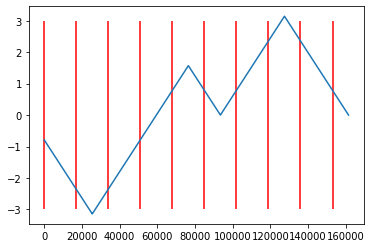

In [404]:
plt.plot(np.angle(baseband[samples_per_symbol//2:samples_per_symbol*10]))
plt.vlines(np.arange(10)*samples_per_symbol, -3, 3, 'r')

In [413]:
np.hstack([[1,2,3],[4,5,6]])

array([1, 2, 3, 4, 5, 6])

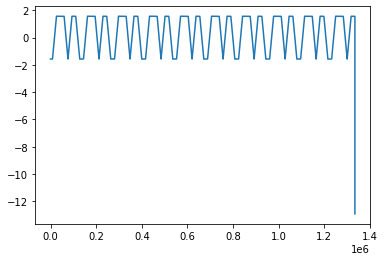

In [425]:
plt.plot(np.unwrap(np.angle(baseband[3*samples_per_symbol//2:]))-np.unwrap(np.angle(baseband[samples_per_symbol//2:-samples_per_symbol])))

In [435]:
decoded = (np.unwrap(np.angle(baseband[1+3*samples_per_symbol//2:]))-np.unwrap(np.angle(baseband[1+samples_per_symbol//2:-samples_per_symbol])))[::samples_per_symbol]

In [436]:
(decoded > 0).astype(int)

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1])

array([-1.57079748e+00, -1.80179711e-04,  1.57079748e+00,  1.57079748e+00,
        1.73249722e-04, -1.70939726e-04,  1.57079748e+00,  1.66319733e-04,
       -1.57079748e+00, -1.61699741e-04,  1.57079748e+00,  1.57079748e+00,
        1.54769752e-04, -1.52459756e-04,  1.57079748e+00,  1.47839763e-04,
       -1.57079748e+00, -1.43219770e-04,  1.57079748e+00,  1.57079748e+00,
        1.36289782e-04, -1.33979785e-04,  1.57079748e+00,  1.29359793e-04,
       -1.57079748e+00, -1.24739800e-04,  1.57079748e+00,  1.57079748e+00,
        1.17809811e-04, -1.15499815e-04,  1.57079748e+00,  1.10879822e-04,
       -1.57079748e+00, -1.06259830e-04,  1.57079748e+00,  1.57079748e+00,
        9.93298409e-05, -9.70198446e-05,  1.57079748e+00,  9.23998520e-05,
       -1.57079748e+00, -8.77798593e-05,  1.57079748e+00,  1.57079748e+00,
        8.08498704e-05, -7.85398740e-05,  1.57079748e+00,  7.39198815e-05,
       -1.57079748e+00, -6.92998889e-05,  1.57079748e+00,  1.57079748e+00,
        6.23699001e-05, -